In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
%matplotlib inline
plt.style.use("fivethirtyeight")

# Initial exploration

In [3]:
df = pd.read_csv("blackjack.csv")

In [4]:
df.shape

(70000, 20)

In [5]:
df.describe()

,num_decks,dealer_open,dealer_initial,dealer_hit,dealer_num_hits,dealer_final,dealer_busts,player_card_one,player_card_two,player_inital,player_hit,player_num_hits,player_final,player_busts,player_loses,draw,player_wins,strategy
count,70000.0,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,4.0,6.539086,14.555757,0.407786,0.559429,18.084629,0.178443,6.545271,6.552157,14.557143,0.572786,0.842943,19.905057,0.297243,0.545629,0.071671,0.382700,0.500000
std,0.0,3.154713,4.090370,0.491426,0.776654,4.373837,0.382888,3.146941,3.157358,4.088699,0.494677,0.894604,3.901070,0.457048,0.497917,0.257945,0.486049,0.500004
min,4.0,1.000000,4.000000,0.000000,0.000000,4.000000,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.0,4.000000,12.000000,0.000000,0.000000,16.000000,0.000000,4.000000,4.000000,12.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.0,7.000000,15.000000,0.000000,0.000000,19.000000,0.000000,7.000000,7.000000,15.000000,1.000000,1.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.500000
75%,4.0,10.000000,18.000000,1.000000,1.000000,21.000000,0.000000,10.000000,10.000000,18.000000,1.000000,1.000000,22.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,4.0,10.000000,21.000000,1.000000,5.000000,26.000000,1.000000,10.000000,10.000000,21.000000,1.000000,6.000000,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.groupby("strategy")[["player_wins"]].sum()

,player_wins
strategy,
0,12787
1,14002


## Dealer's open card

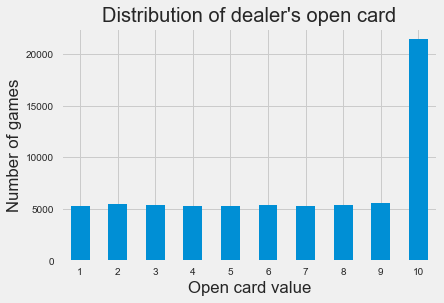

In [7]:
df["dealer_open"].value_counts(sort=False).plot(kind="bar", rot=0);
plt.xlabel("Open card value");
plt.ylabel("Number of games");
plt.title("Distribution of dealer's open card");

## Player's card one

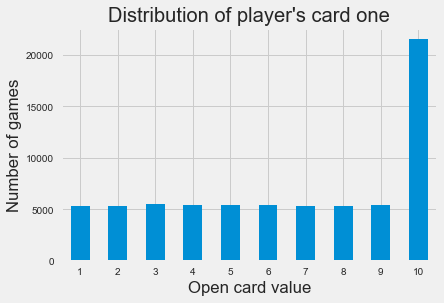

In [8]:
df["player_card_one"].value_counts(sort=False).plot(kind="bar", rot=0);
plt.xlabel("Open card value");
plt.ylabel("Number of games");
plt.title("Distribution of player's card one");

## Player's card two

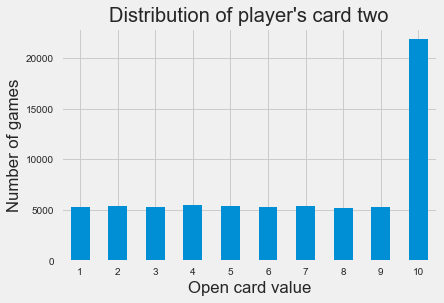

In [9]:
df["player_card_two"].value_counts(sort=False).plot(kind="bar", rot=0);
plt.xlabel("Open card value");
plt.ylabel("Number of games");
plt.title("Distribution of player's card two");

## Player's possible points

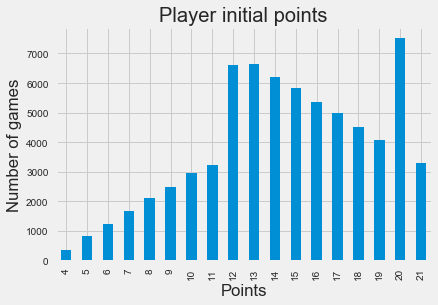

In [132]:
df.player_inital.value_counts().sort_index().plot(kind="bar");
plt.xlabel("Points");
plt.ylabel("Number of games");
plt.title("Player initial points");

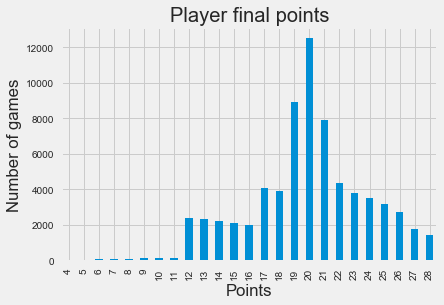

In [133]:
df.player_final.value_counts().sort_index().plot(kind="bar");
plt.xlabel("Points");
plt.ylabel("Number of games");
plt.title("Player final points");

# Recommended vs random strategy

In [27]:
result_cols = ["dealer_busts", "player_busts", "player_loses", "draw", "player_wins"]

In [28]:
# Simulate trials of 100 games
def sim_trial(strategy=0):
    sub = df[df.strategy == strategy]
    to_get = np.random.choice(sub.index, 100)
    trials = sub.ix[to_get]
    trials = trials[result_cols]
    return pd.DataFrame(trials.sum()).T

In [29]:
sim_trial()

,dealer_busts,player_busts,player_loses,draw,player_wins
0,10,49,60,9,31


In [30]:
def n_trials(strategy=0, n=5000):
    trials = sim_trial(strategy=strategy)
    for _ in range(n-1):
        trials = pd.concat([trials, sim_trial(strategy=strategy)])
    return trials

In [31]:
ran = n_trials()
rec = n_trials(strategy=1)

In [32]:
# combine with older files
def save_file(trials, filename):
    try:
        old_trials = pd.read_csv(filename+".csv")
        trials = pd.concat([old_trials, trials])
    except:
        pass
    trials.to_csv(filename+".csv", index=False)

In [33]:
save_file(ran, "ran_trials")
save_file(rec, "rec_trials")

In [34]:
ran = pd.read_csv("ran_trials.csv")
rec = pd.read_csv("rec_trials.csv")

In [35]:
print (ran.shape)
print (rec.shape)

(15000, 5)
(15000, 5)


## Number of wins

$H_0$: There is no difference in expected number of wins for the player between a random strategy and a recommended strategy.

$H_1$: There is a difference in expected number of wins for the player between a random strategy and a recommended strategy.

Significance level, $\alpha$: 5%

- Instead of simulating trials, we'll draw random samples from the dataset that we've created

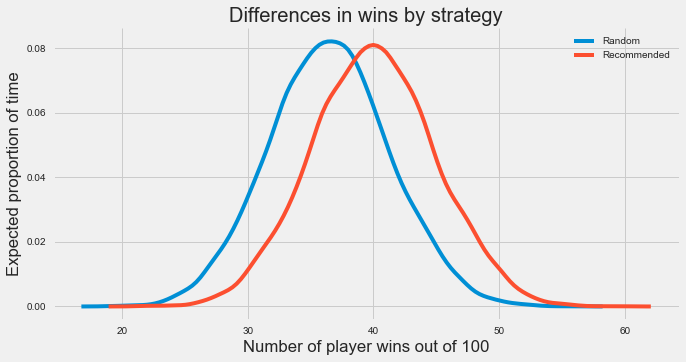

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5));
sns.distplot(ran.player_wins, 
             hist=False, label="Random");
sns.distplot(rec.player_wins, 
             hist=False, label="Recommended");
ax.set_title("Differences in wins by strategy");
ax.set_ylabel("Expected proportion of time");
ax.set_xlabel("Number of player wins out of 100");
sns.despine();

In [37]:
# Is the difference significant?
stats.ttest_ind(ran.player_wins, rec.player_wins)

Ttest_indResult(statistic=-62.361060531128729, pvalue=0.0)

## Number of losses

$H_0$: There is no difference in expected number of losses for the player between a random strategy and a recommended strategy.

$H_1$: There is a difference in expected number of losses for the player between a random strategy and a recommended strategy.

Significance level, $\alpha$: 5%

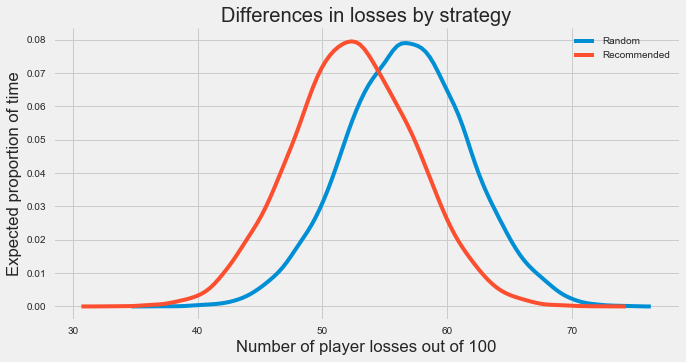

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5));
sns.distplot(ran.player_loses, 
             hist=False, label="Random");
sns.distplot(rec.player_loses, 
             hist=False, label="Recommended");
ax.set_title("Differences in losses by strategy");
ax.set_ylabel("Expected proportion of time");
ax.set_xlabel("Number of player losses out of 100");
sns.despine();

In [39]:
# Is the difference significant?
stats.ttest_ind(ran.player_loses, rec.player_loses)

Ttest_indResult(statistic=74.391666876443992, pvalue=0.0)

## Number of busts

$H_0$: There is no difference in expected number of busts for the player between a random strategy and a recommended strategy.

$H_1$: There is a difference in expected number of busts for the player between a random strategy and a recommended strategy.

Significance level, $\alpha$: 5%

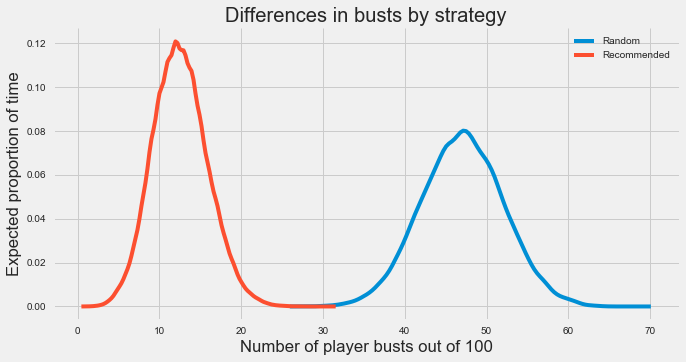

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5));
sns.distplot(ran.player_busts, 
             hist=False, label="Random");
sns.distplot(rec.player_busts, 
             hist=False, label="Recommended");
ax.set_title("Differences in busts by strategy");
ax.set_ylabel("Expected proportion of time");
ax.set_xlabel("Number of player busts out of 100");
sns.despine();

In [41]:
# Is the difference significant?
stats.ttest_ind(ran.player_busts, rec.player_busts)

Ttest_indResult(statistic=702.27763314552294, pvalue=0.0)

## What about dealer busts?

$H_0$: There is no difference in expected number of busts for the dealer between a random strategy and a recommended strategy.

$H_1$: There is a difference in expected number of busts for the dealer between a random strategy and a recommended strategy.

Significance level, $\alpha$: 5%

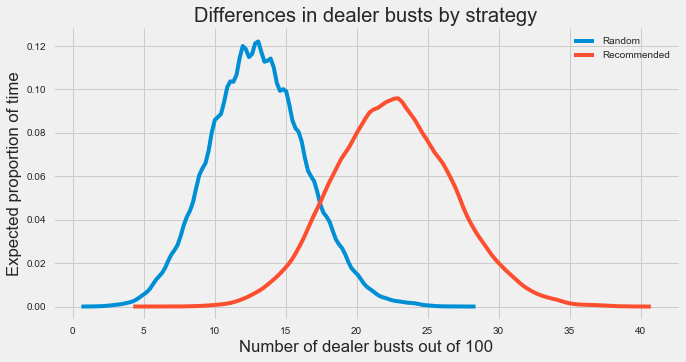

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5));
sns.distplot(ran.dealer_busts, 
             hist=False, label="Random");
sns.distplot(rec.dealer_busts, 
             hist=False, label="Recommended");
ax.set_title("Differences in dealer busts by strategy");
ax.set_ylabel("Expected proportion of time");
ax.set_xlabel("Number of dealer busts out of 100");
sns.despine();

In [43]:
# Is the difference significant?
stats.ttest_ind(ran.dealer_busts, rec.dealer_busts)

Ttest_indResult(statistic=-217.72795396493279, pvalue=0.0)

## Findings

- Using the recommended strategy
    - Expected wins are greater
    - Expected losses are lower
    - Expected player busts are lower
    - Expected dealer busts are higher
        - Does this make sense?
        - Why would the player's strategy affect the dealer's hand?
- Seems like using the recommended strategy does improve our chances of winning
    - But is it enough?

# In-depth exploration

In [44]:
df.head()

,num_decks,dealer_open,dealer_initial,dealer_hit,dealer_num_hits,dealer_final,dealer_busts,player_card_one,player_card_two,player_inital,player_hit,player_num_hits,player_final,player_busts,player_loses,draw,player_wins,strategy,dealer_hand,player_hand
0,4,10,19,0,0,19,0,9,9,18,1,1,24,1,1,0,0,0,"K,9","9,9,6"
1,4,10,20,0,0,20,0,6,6,12,1,2,24,1,1,0,0,0,"Q,10","6,6,3,9"
2,4,4,14,0,0,14,0,5,4,9,1,2,25,1,1,0,0,0,"4,Q","5,4,6,J"
3,4,6,10,0,0,10,0,10,4,14,1,2,22,1,1,0,0,0,"6,4","Q,4,A,7"
4,4,8,12,0,0,12,0,3,4,7,1,2,22,1,1,0,0,0,"8,4","3,4,5,10"


In [45]:
score_cols = ["player_loses", "draw", "player_wins"]

## Is splitting 8's always better than just keeping them?

In [178]:
def get_combi(cards):
    card_list = list(cards)
    card_list.sort()
    card_list = [str(i) for i in card_list]
    return "".join(card_list)

In [200]:
def get_other(cards, number):
    card_list = list(cards)
    card_list.remove(number)
    return card_list[0]

In [182]:
eights = df.copy()
eights = eights[(df.player_card_one == 8) | (df.player_card_two == 8)]
eights = eights[["player_card_one", "player_card_two", "player_wins"]]
eights.reset_index(drop=True, inplace=True)

In [183]:
eights["combination"] = eights[["player_card_one", "player_card_two"]].apply(get_combi, axis=1)

In [185]:
eights.head()

,player_card_one,player_card_two,player_wins,combination
0,10,8,0,810
1,9,8,0,89
2,8,10,1,810
3,8,9,0,89
4,2,8,1,28


In [184]:
eights.shape

(10198, 4)

In [194]:
for i in range(eights.shape[0]):
    eights.ix[i, "other"] = get_other(eights[["player_card_one", "player_card_two"]].ix[i], 8)

In [197]:
eights["other"] = eights["other"].astype(int)

In [198]:
eights.head()

,player_card_one,player_card_two,player_wins,combination,other
0,10,8,0,810,10
1,9,8,0,89,9
2,8,10,1,810,10
3,8,9,0,89,9
4,2,8,1,28,2


In [199]:
eights.other.value_counts()

10    3314
7      832
6      827
5      827
4      823
2      816
1      808
9      796
3      789
8      366
Name: other, dtype: int64

In [80]:
eights["other"] = eights["combination"].apply(lambda x: int(x.replace("8", "") if x != "88" else "8"))

In [152]:
eights.head()

,player_card_one,player_card_two,player_wins,combination,other
21,10,8,0,810,10
25,9,8,0,89,9
34,8,10,1,810,10
40,8,9,0,89,9
41,2,8,1,28,2


In [223]:
e_wins = eights.groupby("other")["player_wins"].agg([sum, len])

In [224]:
e_wins

,sum,len
other,,
1,472,808
2,377,816
3,377,789
4,217,823
5,215,827
6,197,827
7,211,832
8,93,366
9,182,796


In [225]:
e_wins["prob"] = e_wins["sum"]/e_wins["len"]

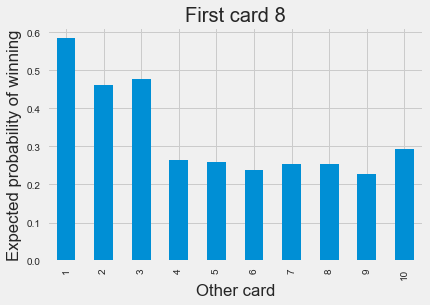

In [226]:
e_wins["prob"].plot(kind="bar");
plt.title("First card 8");
plt.xlabel("Other card");
plt.ylabel("Expected probability of winning");

In [211]:
for i in range(1,11):
    if i != 8:
        r = stats.ttest_ind(eights["player_wins"][eights["other"]==i], eights["player_wins"][eights["other"]==8])
        if r.pvalue < 0.05:
            msg = "rejected."
        else:
            msg = "not rejected."
        print ("Null hypothesis: There is no difference in wins whether your second card is {} or 8.\nSignificance level = 5%".format(i))
        print ("Other card: {}\np-value: {:.6f}\np-value < 5%: {}\nNull hypothesis {}\n".format(i, r.pvalue, r.pvalue < 0.05, msg))

Null hypothesis: There is no difference in wins whether your second card is 1 or 8.
Significance level = 5%
Other card: 1
p-value: 0.000000
p-value < 5%: True
Null hypothesis rejected.

Null hypothesis: There is no difference in wins whether your second card is 2 or 8.
Significance level = 5%
Other card: 2
p-value: 0.000000
p-value < 5%: True
Null hypothesis rejected.

Null hypothesis: There is no difference in wins whether your second card is 3 or 8.
Significance level = 5%
Other card: 3
p-value: 0.000000
p-value < 5%: True
Null hypothesis rejected.

Null hypothesis: There is no difference in wins whether your second card is 4 or 8.
Significance level = 5%
Other card: 4
p-value: 0.728865
p-value < 5%: False
Null hypothesis not rejected.

Null hypothesis: There is no difference in wins whether your second card is 5 or 8.
Significance level = 5%
Other card: 5
p-value: 0.830781
p-value < 5%: False
Null hypothesis not rejected.

Null hypothesis: There is no difference in wins whether your

### What about other numbers

In [229]:
def test_doubles(number):
    num_df = df.copy()
    num_df = num_df[(num_df["player_card_one"]==number) | (num_df["player_card_two"]==number)]
    num_df = num_df[["player_card_one", "player_card_two", "player_wins"]]
    num_df.reset_index(drop=True, inplace=True)
    num_df["combination"] = num_df[["player_card_one", "player_card_two"]].apply(get_combi, axis=1)

    for i in range(num_df.shape[0]):
        num_df.ix[i, "other"] = get_other(num_df[["player_card_one", "player_card_two"]].ix[i], number)
    
    num_wins = num_df.groupby("other")["player_wins"].agg([sum, len])
    num_wins["prob"] = num_wins["sum"]/num_wins["len"]
    
    num_wins["prob"].plot(kind="bar");
    plt.title("First card {}".format(number));
    plt.xlabel("Other card");
    plt.ylabel("Expected probability of winning");
    plt.show();
    
#     for i in range(1,11):
#         if i != number:
#             r = stats.ttest_ind(num_df["player_wins"][num_df["other"]==i], num_df["player_wins"][num_df["other"]==number])
#             if r.pvalue < 0.05:
#                 msg = "rejected."
#             else:
#                 msg = "not rejected."
#             print ("Null hypothesis: There is no difference in wins whether your second card is {} or {}.\nSignificance level = 5%".format(i, number))
#             print ("Other card: {}\np-value: {:.6f}\np-value < 5%: {}\nNull hypothesis {}\n".format(i, r.pvalue, r.pvalue < 0.05, msg))

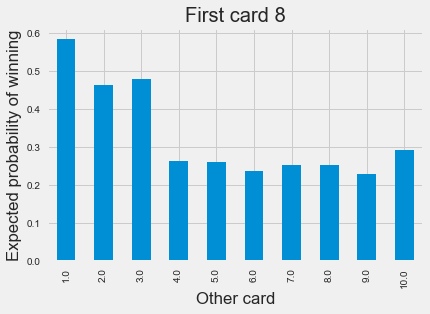

In [230]:
test_doubles(8)

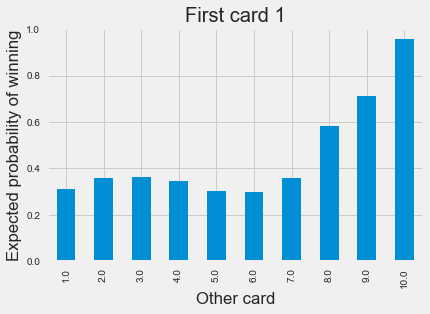

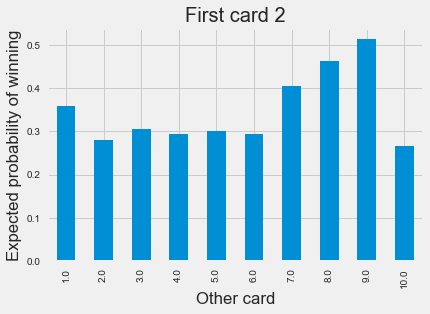

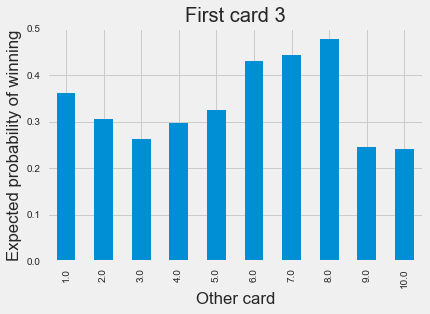

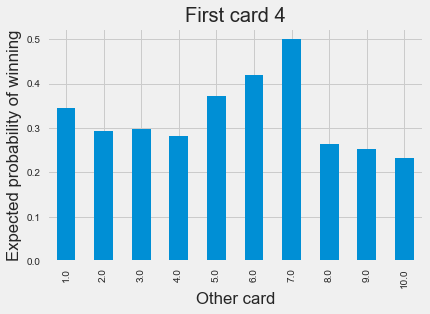

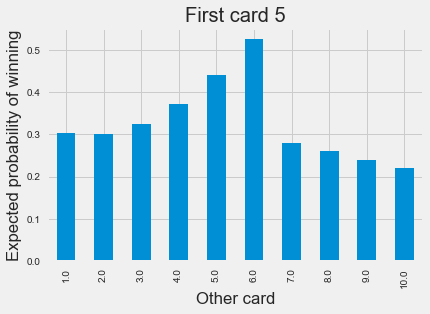

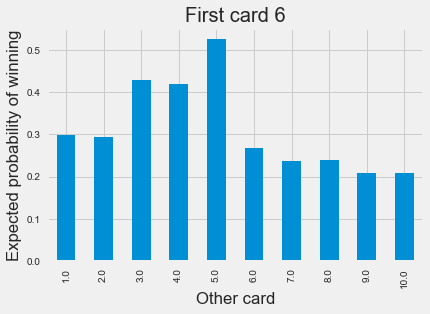

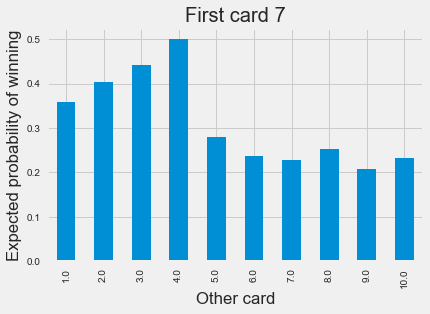

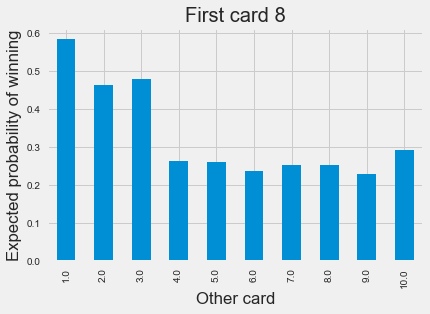

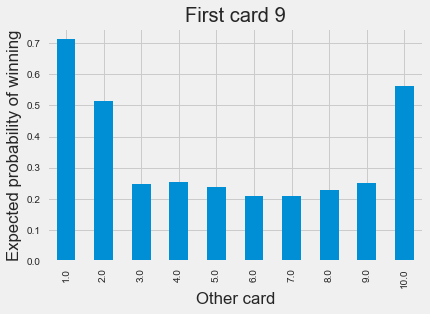

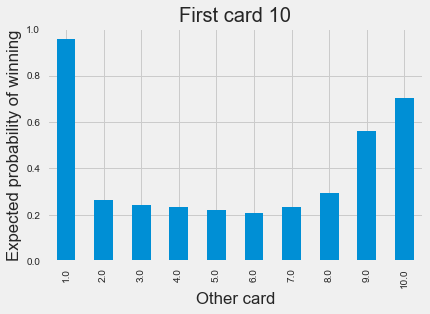

In [231]:
for i in range(1,11):
    test_doubles(i)

## Do we always do better when hitting on 12-16's?

In [232]:
sub1216 = df.copy()

In [ ]:
sub1216 = sub1216["player_initial"]

## Do we always do worse when hitting on 17's and above?